**Você é um cientista de dados contratado por uma empresa imobiliária para desenvolver um modelo que ajude a prever o preço de casas com base em algumas características.**

**A empresa possui um grande banco de dados com informações sobre diversas propriedades, como tamanho do lote, número de quartos, idade da casa, entre outras. Eles acreditam que, com um modelo preditivo eficiente, poderão ajustar melhor seus preços e oferecer melhores recomendações aos seus clientes.**

**Nesse cenário, você será guiado na construção de um modelo de regressão linear simples, mas eficaz, para prever o preço das casas usando Python e a biblioteca Scikit-learn.**

**Você vai trabalhar com um dataset que contém informações de vendas de casas em uma cidade dos EUA. Você precisa criar um dataset com as seguintes colunas:**

 - **Área do lote (em pés quadrados);**

 - **Ano de construção da casa;**

 - **Área do primeiro andar (em pés quadrados);**

 - **Área do segundo andar (em pés quadrados);**

 - **Número de banheiros completos;**

 - **Número de quartos acima do solo;**

 - **Número total de quartos acima do solo (excluindo banheiros);**

 - **Preço de venda da casa (em reais).**

**Seu objetivo é construir um modelo que use as outras variáveis do dataset para prever o preço de venda da casa.**





In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
#Criando dataset
data = {
    'area_lote': [4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000],
    'ano_construcao': [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018],
    'area_primeiro_andar': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900],
    'area_segundo_andar': [0, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'banheiros': [1, 1, 2, 2, 2, 3, 3, 3, 4, 4],
    'quartos': [2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
    'preco_venda': [
        220000, 240000, 260000, 280000, 310000,
        340000, 370000, 400000, 430000, 460000
    ]
}
df = pd.DataFrame(data)
df

,area_lote,ano_construcao,area_primeiro_andar,area_segundo_andar,banheiros,quartos,preco_venda
0,4500,2000,1000,0,1,2,220000
1,5000,2002,1100,200,1,2,240000
2,5500,2004,1200,300,2,3,260000
3,6000,2006,1300,400,2,3,280000
4,6500,2008,1400,500,2,3,310000
5,7000,2010,1500,600,3,4,340000
6,7500,2012,1600,700,3,4,370000
7,8000,2014,1700,800,3,4,400000
8,8500,2016,1800,900,4,5,430000
9,9000,2018,1900,1000,4,5,460000


In [ ]:
# Análise Exploratória dos Dados (EDA)
df.describe()


,area_lote,ano_construcao,area_primeiro_andar,area_segundo_andar,banheiros,quartos,preco_venda
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6750.000000,2009.000000,1450.000000,540.000000,2.500000,3.500000,331000.000000
std,1513.825177,6.055301,302.765035,320.416396,1.080123,1.080123,82657.257529
min,4500.000000,2000.000000,1000.000000,0.000000,1.000000,2.000000,220000.000000
25%,5625.000000,2004.500000,1225.000000,325.000000,2.000000,3.000000,265000.000000
50%,6750.000000,2009.000000,1450.000000,550.000000,2.500000,3.500000,325000.000000
75%,7875.000000,2013.500000,1675.000000,775.000000,3.000000,4.000000,392500.000000
max,9000.000000,2018.000000,1900.000000,1000.000000,4.000000,5.000000,460000.000000


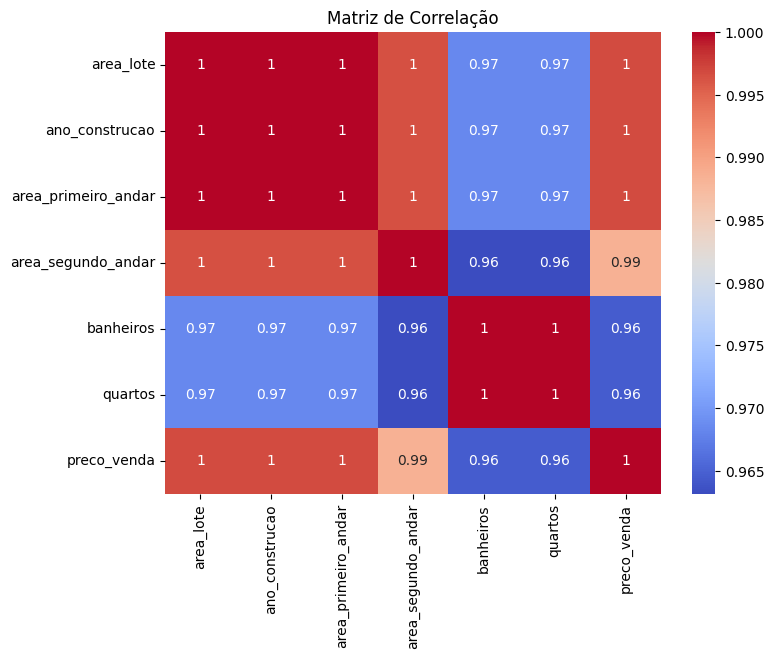

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

A matriz de corrrelação está indicando que o preço de venda apresntea forte correlação positiva com todas as vaiáveis analisadas, especialmente com as relacionadas a área construída. Temos também uma forte entre as próprias variávei explicativas, indicando multicolinearidade severa. Esse comportamento sugere que essas variáveis compartilham informações semelhantes, o que pode impactar a interpretação dos coeficientes em modelos de regressão linear, embora não comprometa necessariamente o poder preditivo do modelo.

REGRESSÃO LINEAR

In [ ]:
#Separando a variável rótulo
X = df.drop('preco_venda', axis=1)
y = df['preco_venda']

In [ ]:
#Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Criação e treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predição com os dados de teste
y_pred = modelo.predict(X_test)

In [ ]:
#Avaliação do modelo pelas métricas mse e r^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio (MSE) no modelo de Regressão Linear: {mse:.2f}")
print(f"Coeficiente de determinação (R²) no modelo de Regressão Linear: {r2:.2f}")

Erro quadrático médio (MSE) no modelo de Regressão Linear: 135937500.00
Coeficiente de determinação (R²) no modelo de Regressão Linear: 0.98


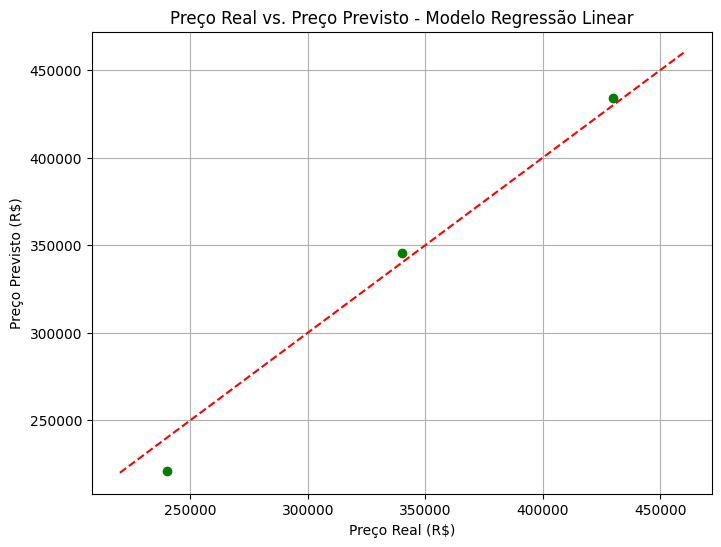

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.title('Preço Real vs. Preço Previsto - Modelo Regressão Linear')
plt.grid(True)
plt.show()

RANDOM FOREST REGRESSOR

In [ ]:
#criação e treinamento do modelo
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Predição com os dados de teste
y_pred_rf = modelo_rf.predict(X_test)

In [ ]:
##Avaliação do modelo pelas métricas mse e r^2
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Erro quadrático médio (MSE) no Random Forest Regresssor: {mse_rf:.2f}")
print(f"Coeficiente de determinação (R²) no Random Forest Regressor: {r2_rf:.2f}")

Erro quadrático médio (MSE) no Random Forest Regresssor: 40853333.33
Coeficiente de determinação (R²) no Random Forest Regressor: 0.99


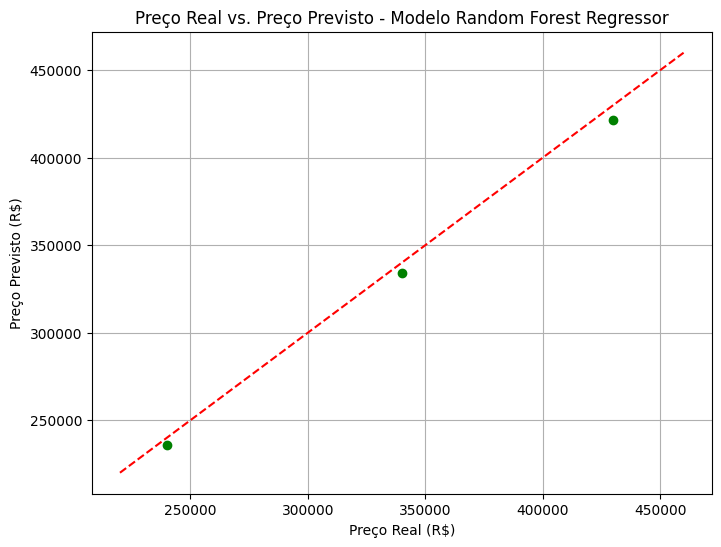

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.title('Preço Real vs. Preço Previsto - Modelo Random Forest Regressor')
plt.grid(True)
plt.show()

Os resultados indicam que ambos os modelos apresentam excelente capacidade preditiva, com coeficientes de determinação elevados. No entanto, o Random Forest Regressor obteve desempenho superior, apresentando menor erro quadrático médio e maior valor de R². Isso sugere que o modelo baseado em árvores é mais adequado para capturar padrões complexos e relações não lineares presentes nos dados, além de ser mais robusto à multicolinearidade observada entre as variáveis explicativas.